# Data Preprocessing

Most important part of creating a model is to have a sound business nowledge of the problem you are trying to solve. 

## Types of research
1. Primary research: Done by yourself
    * **Discussions:** Ask questions and gather information from the stakeholders.
    * **Dry Run:** If possible take a dry run of the problem you are trying to investigate


2. Secondary research: Done by others
    * **Reports and Studies:** Read reports and studies by government agencies, trade associations or other businesses in your industry.
    * **Previous works:** Go through any previous work and findings related to your problem.

### Example:
Cart abondonment Analysis

Problem: high fractions of your online customer are adding product to their cart but not purchasing it.

**Business knowledge that will be helpful**
1. Discussions with marketing team (primary research)
2. Discussions with the product team (primary research)
3. Dry run of the online purchasing process to understand customer journey (primary research)
4. Research on industry reports regarding cart abondonment (secondary research)
5. Any previous work in your/ohter organization regarding cart abondonment (secondary research)

## Data Exploration
Next step should be to use the acquired business knowledge to search for relevant data

**Steps:**
1. Identify data need.
2. Plan data request.
3. Quality check.

* Data requested types:
1. **Internal Data:** Data collected by your organization. E.G.: Usage data, sales data, promotion data
2. **External Data:** Data acquired from external data sources. E.G.: Census data, external vendor data, scrape data

### Example Cont.:
1. Input from the marketing team: Our 50% comes from e-mail marketing, 30% from organic search and rest 20% from ad word marketing -> Gather the source website data for all costumers.
2. Input from the product team: We have 3 step purchase process - Cart reviewe, address/personal detail, payment. -> Gather the cart abondonment location for all customer.
3. Input from industry reports regarding cart abandonment: Custoers tend to put high value item for long duration in their carts. -> Gahter the data about total cart value of all customers
4. Input from dry run: Encountered a survey link for ate website experience. -> Gather survey data for all customers.

## Data Dictionary
This is helpful to understand the data. You should know variable definition and distribution along with table's unique identifiers and foreign keys. 

**A comprehensive Data Dictionary should include:**
1. Definition of predictors.
2. Unique identifier of each table (or primary keys).
3. foreign keys or matching keys between tables.
4. Explanation of values in case of categorical variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

dataset = pd.read_csv('House_Price.csv', header = 0)

In [2]:
dataset.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [3]:
dataset.shape

(506, 19)

## Univariate Analysis

Univariate analysis is the simplest form of analyzing data. "Uni" means "one", so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patters in the data.

**Ways to describe patterns found in univariate data:**
1. Central tendency
    * Mean
    * Mode
    * Median
2. Dispersion
    * Range
    * Variance
    * Maximum, minimum
    * Quartiles (including the interquartile range)
    * Standard deviation
3. Count/Null count

In [4]:
dataset.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


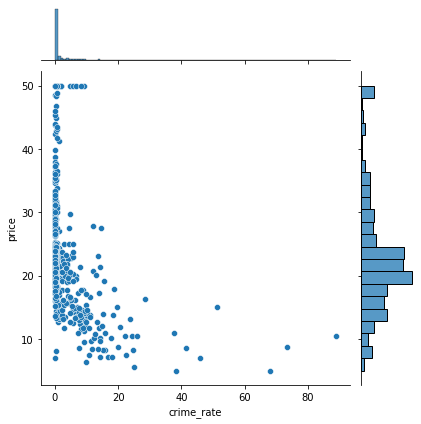

In [15]:
sns.jointplot(x='crime_rate', y='price', data=dataset)

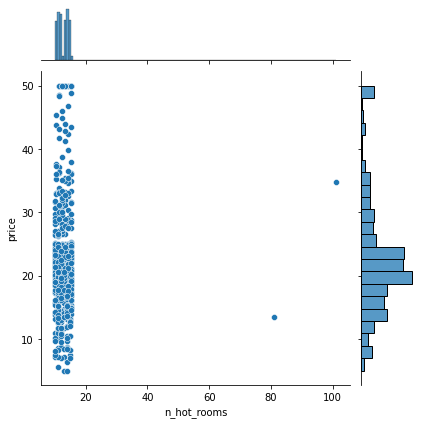

In [6]:
sns.jointplot(x='n_hot_rooms', y='price', data=dataset)

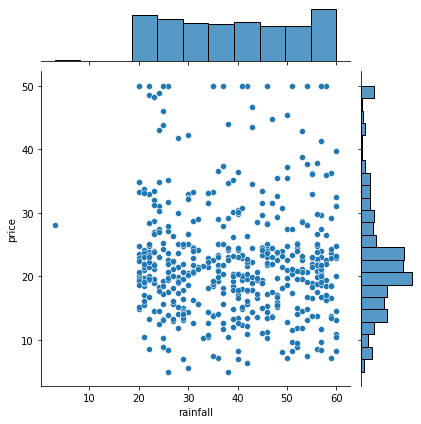

In [7]:
sns.jointplot(x='rainfall', y='price', data=dataset)

In [9]:
dataset.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<AxesSubplot:xlabel='airport', ylabel='count'>

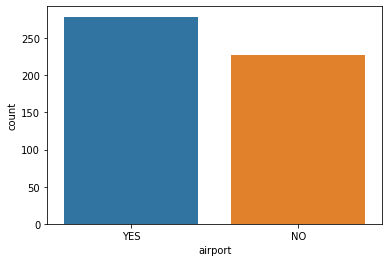

In [11]:
sns.countplot(x='airport', data=dataset)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

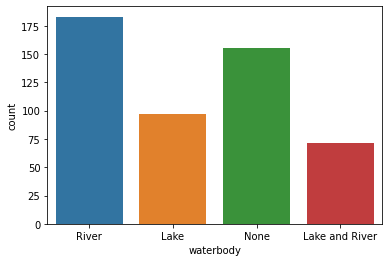

In [12]:
sns.countplot(x='waterbody', data=dataset)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

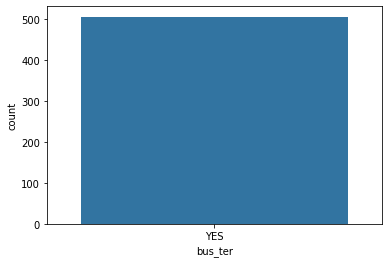

In [14]:
sns.countplot(x='bus_ter', data=dataset)

## Outlier Tratment

Outlier is a commonly used terminology by analysts and data scientists. Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

* Reasons:
    - Data entry errors
    - Measurement error
    - Sampling error

* Impact:
    - It increases the error variance and reduces the power of statistical tests

* Solution:
    - Detect outliers using EDD and visualization methods such as scatter plot, histogram of box plots
    - Impute outliers


### Methods to treat outliers
1. Capping and Flooring:
    - Impute all the values above 3* P99 and below 0.3* P1
    - Impute with values 3* P99 and 0.3* P1
    - You can use any multiplier instead of 3, as  per your business requirement

2. Exponential smoothing:
    - Extrapolate curve between P95 to P99 and cap all the values falling outside to the value generated by te curve
    - Similarly, extrapolate curve beteen P5 and P1

3. Sigma approach:
    - Identify outliers by capturing all the values falling outside u + xo
    - You can use any multiplier as x, as per your business requirement

##### Observations

1. Missing values in n_hos_beds
2. Skewness or outliers in crime rate
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter only has 'Yes' values.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [19]:
uv = np.percentile(dataset.n_hot_rooms, [99])[0]

In [22]:
dataset[(dataset.n_hot_rooms > uv)]     # Getting the outliers, those with n_hot_rooms above the 99 percentile

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [21]:
dataset.n_hot_rooms[(dataset.n_hot_rooms > 3*uv)] = 3*uv        # Treating those outliers with a value 3 times greater than the upper value, new value is 3 times the upper value

C:\Users\teddy\AppData\Local\Temp/ipykernel_1156/76292008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.n_hot_rooms[(dataset.n_hot_rooms > 3*uv)] = 3*uv


In [26]:
lv = np.percentile(dataset.rainfall, [1])[0]

In [27]:
dataset[(dataset.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [28]:
dataset.rainfall[(dataset.rainfall < 0.3*lv)] = 0.3*lv

C:\Users\teddy\AppData\Local\Temp/ipykernel_1156/2327159450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rainfall[(dataset.rainfall < 0.3*lv)] = 0.3*lv


In [29]:
dataset.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


## Missing Value Imputation

Real world data often has missing values. Data can have missing values for a number of reasons such as observations that were not recorded and data corruption

- Impact:
    - Handling missing data is important as many machine learning algorithms do not support data with missing values.

- Solution:
    - Remove row with missing data from your dataset
    - Input missing values with mean/median values in your dataset

- Note:
    - Use business knowledge to take separate approach for each variable
    - it is advisable to impute instead of remove in case of small sample size or large proportion of observations with missing values


### Methods to treat missing values
1. Impute with Zero
    - Impute missing values with zero

2. Impute with Median/Mean/Mode
    - For numerical variables, impute missinig values with Mean or Median
    - for categorial variables, impute missing values with Mode

3. Segment bases imputation
    - Identify relevant segments
    - Calculate mean/meadian/mode of segmetns
    - Impute the missing values according to the segments
    - For example, we can say rainfall hardly varies for cities in a particular state
    - In this case, we can impute missing rainfall value of a city with the average of that state.